## CHECK VERSIONS

In [94]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)

Windows-10-10.0.18362-SP0
Python 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
NumPy 1.16.4
SciPy 1.2.1
Scikit-Learn 0.21.2


In [95]:

def OneHotEncode(x,classAmount):
    import numpy as np
    from numpy import argmax
    # integer encode input data
    integer_encoded = list(np.floor(x).astype(int))
    # one hot encode
    onehot_encoded = list()
    for value in integer_encoded:
        temp = [0 for _ in range(classAmount)]
        temp[value] = 1
        onehot_encoded.append(temp)
    return np.array(onehot_encoded)
# invert encoding


## LOAD DATA (TRAINNING)

In [96]:
import numpy as np 

root ="Dataset/"

datafile = root +"data"+"InSampleMel-Log-TT-24534 A-19 H-35 C-30 V-14-98-40 14-Dec-2019-1812H.npy"
targetfile = root +"target"+"InSampleMel-Log-TT-24534 A-19 H-35 C-30 V-14-98-40 14-Dec-2019-1812H.npy"

InsampleloadTarget = np.load(targetfile) # load
InsampleloadData = np.load(datafile) #

X=InsampleloadData
y=InsampleloadTarget


AAA = list(y).count(0.000)
HHH = list(y).count(1.000)
CCC = list(y).count(2.000)
VVV = list(y).count(3.000)
i=AAA+HHH+CCC+VVV
Aper = int(AAA/i*100)
Hper = int(HHH/i*100)
Cper = int(CCC/i*100)
Vper = int(VVV/i*100)
print(i,"Data")
print(AAA,"samples 0-Ambience ",Aper,"%")
print(HHH,"samples 1-Hatchet ",Hper,"%")
print(CCC,"samples 2-Chainsaw ",Cper,"%")
print(VVV,"samples 3-Vehicle ",Vper,"%")
print ("Final Data Extracted Shape",X.shape)
print ("Final Target Extracted Shape",y.shape)

24534 Data
4878 samples 0-Ambience  19 %
8694 samples 1-Hatchet  35 %
7479 samples 2-Chainsaw  30 %
3483 samples 3-Vehicle  14 %
Final Data Extracted Shape (24534, 98, 40)
Final Target Extracted Shape (24534,)


## LOAD DATA (TESTING)

In [97]:
from sklearn.model_selection import train_test_split
import numpy as np 

root ="C:/Users/Another/CNN/Batch Trainning/Dataset/"

datafile = root +"data"+"NewTrue_Unique-Out-of-SampleMel-Log-TT-7258 A-18 H-36 C-18 V-27-98-40 15-Dec-2019-1044H.npy"
targetfile = root +"target"+"NewTrue_Unique-Out-of-SampleMel-Log-TT-7258 A-18 H-36 C-18 V-27-98-40 15-Dec-2019-1044H.npy"

OutloadTarget = np.load(targetfile) # load
OutloadData = np.load(datafile) #
X_out = OutloadData
y_out = OutloadTarget

XX = OutloadData
yy = OutloadTarget

AAA = list(yy).count(0.000)
HHH = list(yy).count(1.000)
CCC = list(yy).count(2.000)
VVV = list(yy).count(3.000)
i=AAA+HHH+CCC+VVV
Aper = int(AAA/i*100)
Hper = int(HHH/i*100)
Cper = int(CCC/i*100)
Vper = int(VVV/i*100)
print(i,"Data")
print(AAA,"samples 0-Ambience ",Aper,"%")
print(HHH,"samples 1-Hatchet ",Hper,"%")
print(CCC,"samples 2-Chainsaw ",Cper,"%")
print(VVV,"samples 3-Vehicle ",Vper,"%")
print ("Final Data Extracted Shape",XX.shape)
print ("Final Target Extracted Shape",yy.shape)

7258 Data
1330 samples 0-Ambience  18 %
2622 samples 1-Hatchet  36 %
1311 samples 2-Chainsaw  18 %
1995 samples 3-Vehicle  27 %
Final Data Extracted Shape (7258, 98, 40)
Final Target Extracted Shape (7258,)


In [98]:
num_classes = 4

y_in_ONEHOT = OneHotEncode(InsampleloadTarget,num_classes)
y_out_ONEHOT = OneHotEncode(OutloadTarget,num_classes)

y_in_ONEHOT.shape
y_out_ONEHOT.shape

print('Training Features Shape:', InsampleloadData.shape)
print('Training Labels Shape:', y_in_ONEHOT.shape)
print('Testing Features Shape:', OutloadData.shape)
print('Testing Labels Shape:', y_out_ONEHOT.shape)


Training Features Shape: (24534, 98, 40)
Training Labels Shape: (24534, 4)
Testing Features Shape: (7258, 98, 40)
Testing Labels Shape: (7258, 4)


In [99]:
def flattenFeature(x):
    flats = []
    print(len(x))
    for i in range(len(x)):
        flat = np.ndarray.flatten(x[i,:,:])
        flats.append(flat)
    return np.array(flats)


In [100]:

X = flattenFeature(X)
print('Training Features Shape:', X.shape)

XX = flattenFeature(XX)
print('Testing Features Shape:', XX.shape)





24534
Training Features Shape: (24534, 3920)
7258
Testing Features Shape: (7258, 3920)


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42, stratify = y)

print(len(X_train))


X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(XX, yy, test_size=0.80, random_state=42, stratify = yy)

print(len(X_train_out))

4906
1451


In [105]:


#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [139]:
from sklearn import metrics

y_pred=clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?


print("Accuracy:",metrics.accuracy_score(y_pred, y_test))




Accuracy: 0.9308640717342572


ValueError: multiclass format is not supported

In [137]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
              
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    ##CUSTOMIZE GRAFTS - BORDERS THICKNESS 0,75 N COLOUR - BLACK
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap="YlGnBu", linewidths=0.75, linecolor='black')
    
    plt.title("Random Forest 100")
    plt.savefig("Random Forest")
    
    plt.show()

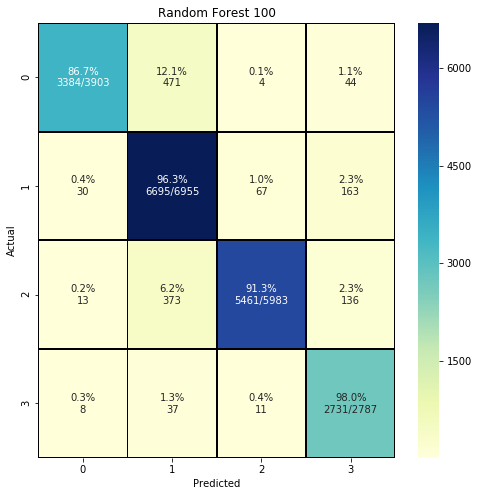

In [138]:
cm_analysis(y_test, y_pred, [0,1,2,3], ymap=None, figsize=(8,8))

## SAVE MODEL 

In [126]:
import pickle
# save the model to disk
filename = 'RandomForest100.sav'
pickle.dump(clf, open(filename, 'wb'))



In [129]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
y_pred=clf.predict(X_test)
